# Calculate the Risk Score

In [87]:
Accident_Parameters = severity_accident[['LATITUDE','LONGITUDE','LOCATION','ADDRESS','INJURIES_FATAL','INJURIES_TOTAL','DAMAGE']]

In [88]:
Accident_Parameters

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,INJURIES_FATAL,INJURIES_TOTAL,DAMAGE
0,41.909977,-87.755823,POINT (-87.755822648009 41.909977009294),1614 N LARAMIE AVE,0.0,0.0,"$501 - $1,500"
1,41.797395,-87.684273,POINT (-87.684272963451 41.797394747543),5300 S WESTERN AVE,0.0,1.0,"OVER $1,500"
2,41.894049,-87.622999,POINT (-87.62299852501 41.894049259418),161 E ERIE ST,0.0,0.0,"OVER $1,500"
3,41.894049,-87.622999,POINT (-87.62299852501 41.894049259418),161 E ERIE ST,0.0,0.0,"OVER $1,500"
4,41.905033,-87.746172,POINT (-87.746171786063 41.905032966964),1324 N CICERO AVE,0.0,0.0,"$501 - $1,500"
...,...,...,...,...,...,...,...
238063,41.874004,-87.676602,POINT (-87.676602341069 41.874003638416),600 S DAMEN AVE,0.0,1.0,"OVER $1,500"
238064,41.751638,-87.564871,POINT (-87.564871437929 41.751638437521),2435 E 79TH ST,0.0,0.0,"$501 - $1,500"
238065,41.751638,-87.564871,POINT (-87.564871437929 41.751638437521),2435 E 79TH ST,0.0,0.0,"$501 - $1,500"
238066,41.721478,-87.650694,POINT (-87.650694262037 41.721478236557),1100 W 95TH ST,0.0,0.0,"OVER $1,500"


In [89]:
#INJURIES_FATAL

Accident_Parameters['INJURIES_FATAL'].unique()

Accident_Parameters['Risk_Parameter_A'] = pd.cut(x=Accident_Parameters['INJURIES_FATAL'], bins = [-1,0,1,2], 
                         labels = [0,1,1.5])

Accident_Parameters.Risk_Parameter_A.value_counts()
Accident_Parameters.Risk_Parameter_A.unique()

[0.0, 1.0, 1.5]
Categories (3, float64): [0.0 < 1.0 < 1.5]

In [90]:
#INJURIES TOTAL

Accident_Parameters['INJURIES_TOTAL'].unique()


Accident_Parameters['Risk_Parameter_B'] = pd.cut(x=Accident_Parameters['INJURIES_TOTAL'], bins = [-1,0,4,6,21], 
                         labels = [0,1,2,3])

Accident_Parameters.Risk_Parameter_B.value_counts()
Accident_Parameters.Risk_Parameter_B.unique()

[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [91]:
#DAMAGE

Accident_Parameters['DAMAGE'].unique()


Damage_score = {'$500 OR LESS': 0,'$501 - $1,500': 1,'OVER $1,500': 2}

Accident_Parameters['Risk_Parameter_C'] = Accident_Parameters['DAMAGE']    
Accident_Parameters['Risk_Parameter_C'] = Accident_Parameters.Risk_Parameter_C.replace(Damage_score)
Accident_Parameters.Risk_Parameter_C.value_counts()

2    159094
1     55711
0     21453
Name: Risk_Parameter_C, dtype: int64

In [92]:
Accident_Parameters.head()

,LATITUDE,LONGITUDE,LOCATION,ADDRESS,INJURIES_FATAL,INJURIES_TOTAL,DAMAGE,Risk_Parameter_A,Risk_Parameter_B,Risk_Parameter_C
0,41.909977,-87.755823,POINT (-87.755822648009 41.909977009294),1614 N LARAMIE AVE,0.0,0.0,"$501 - $1,500",0.0,0,1
1,41.797395,-87.684273,POINT (-87.684272963451 41.797394747543),5300 S WESTERN AVE,0.0,1.0,"OVER $1,500",0.0,1,2
2,41.894049,-87.622999,POINT (-87.62299852501 41.894049259418),161 E ERIE ST,0.0,0.0,"OVER $1,500",0.0,0,2
3,41.894049,-87.622999,POINT (-87.62299852501 41.894049259418),161 E ERIE ST,0.0,0.0,"OVER $1,500",0.0,0,2
4,41.905033,-87.746172,POINT (-87.746171786063 41.905032966964),1324 N CICERO AVE,0.0,0.0,"$501 - $1,500",0.0,0,1


In [93]:
Accident_Parameters[['Risk_Parameter_A', 'Risk_Parameter_B', 'Risk_Parameter_C']] =Accident_Parameters[['Risk_Parameter_A', 'Risk_Parameter_B', 'Risk_Parameter_C']].astype(float)
Accident_Parameters['RISK_SCORE'] = 2*Accident_Parameters['Risk_Parameter_A'] + 1.5*Accident_Parameters['Risk_Parameter_B'] + 1.5*Accident_Parameters['Risk_Parameter_C']
Accident_Parameters['RISK_SCORE'] = Accident_Parameters['RISK_SCORE'].astype(int)

In [94]:
reg_input = Accident_Parameters[['Risk_Parameter_A','Risk_Parameter_B', 'Risk_Parameter_C']]
reg_output = Accident_Parameters['RISK_SCORE']

## Performing Regression to determine the Risk Score

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(reg_input, reg_output, random_state=10)

In [96]:
linear_model = linear_model.LinearRegression()
linear_model.fit(X_train_reg,y_train_reg)
predicted_output = linear_model.predict(X_test_reg)
predicted_output

array([4.12804077, 2.91775521, 2.91775521, ..., 2.91775521, 2.91775521,
       1.29192955])

In [97]:
import statsmodels.api as sm

# Adding Constant for Adjusted R-square

constant = sm.add_constant(X_test_reg)
result = sm.OLS(y_test_reg, constant).fit()
print('R-squared values =',result.rsquared,'\nAdjusted R-Squared Value =', result.rsquared_adj)

R-squared values = 0.9743006427311183 
Adjusted R-Squared Value = 0.9742993373337866


In [98]:
from sklearn.metrics import mean_squared_error
import math
print('The Mean Squared Error Value is = ',mean_squared_error(y_test_reg, predicted_output))
print('The Root Mean Squared Error Value is = ',math.sqrt(mean_squared_error(y_test_reg, predicted_output)))

The Mean Squared Error Value is =  0.03941243123091162
The Root Mean Squared Error Value is =  0.19852564376148393


In [99]:
from sklearn.metrics import mean_absolute_error
print('The Mean Absolute Error Value is = ',mean_absolute_error(y_test_reg, predicted_output))

The Mean Absolute Error Value is =  0.16398049583160038


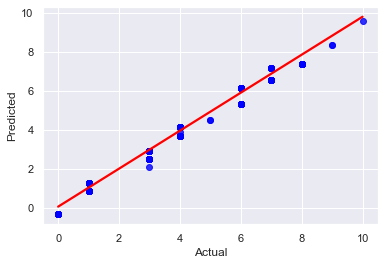

In [100]:
sns.set_theme(color_codes=True)
sns.regplot(x=y_test_reg,y=predicted_output,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.xlabel('Actual');
plt.ylabel('Predicted');